In [26]:
# Dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind
import gmaps
import os

# import csv data files
education_file = "Resources/education.csv"
childmarriage_file = "Resources/childmarriage.csv"


# create dataframes for each
education_file_df = pd.read_csv(education_file, encoding="ISO-8859-1")
childmarriage_file_df = pd.read_csv(childmarriage_file, encoding="ISO-8859-1")
countries_df = pd.read_html('https://developers.google.com/public-data/docs/canonical/countries_csv')

#education_file_df.head()
#childmarriage_file_df.head()
#countries_df[0]

In [4]:
filtered_education = education_file_df.filter(["Indicator"== "Youth literacy rate, population 15-24 years, both sexes (%)",
                                              "LOCATION", "Country","TIME", "Value"])
#filtered_education.head()                       

In [5]:
#childmarriage_file_df.head()
clean_childmarriage=childmarriage_file_df[['Geographic Area','Indicator','Sex','Time Period','Current Age',
                           'Observation Value','Unit of Measure','The period of time for which data are provided']]
clean_childmarriage = clean_childmarriage.rename(columns={"Geographic Area":"Country"})
#clean_childmarriage.head()

In [6]:
#countries_df[0]
clean_countries = countries_df[0].rename(columns={"name":"Country","country":"Abbr"})
#clean_countries.head()

In [7]:
# make country lowercase
clean_childmarriage["Country"] = clean_childmarriage["Country"].map(lambda z: z.lower())
clean_countries["Country"] = clean_countries["Country"].map(lambda z: z.lower())
filtered_education["Country"] = filtered_education["Country"].map(lambda z: z.lower())

In [8]:
childmarriage_final = pd.merge(clean_childmarriage, clean_countries, how="left", on="Country")
childmarriage_final = childmarriage_final.drop(columns=["The period of time for which data are provided","Abbr"])
childmarriage_final
childmarriage_final.head()

,Country,Indicator,Sex,Time Period,Current Age,Observation Value,Unit of Measure,latitude,longitude
0,botswana,Percentage of women (aged 20-24 years) married...,Female,1988,20 to 24 years old,10.0,%,-22.328474,24.684866
1,uzbekistan,Percentage of men (aged 20-24 years) married o...,Male,2002,20 to 24 years old,0.5,%,41.377491,64.585262
2,philippines,Percentage of men (aged 20-24 years) married o...,Male,2003,20 to 24 years old,2.9,%,12.879721,121.774017
3,south africa,Percentage of women (aged 20-24 years) married...,Female,2003,20 to 24 years old,0.8,%,-30.559482,22.937506
4,south africa,Percentage of women (aged 20-24 years) married...,Female,2003,20 to 24 years old,5.6,%,-30.559482,22.937506


In [9]:
education_final = pd.merge(filtered_education, clean_countries, how="left", on="Country")
education_final = education_final.drop(columns=["LOCATION","Abbr"])
education_final.head()

,Country,TIME,Value,latitude,longitude
0,morocco,1982,0.53256,31.791702,-7.09262
1,morocco,1994,0.64434,31.791702,-7.09262
2,morocco,2004,0.74865,31.791702,-7.09262
3,morocco,2008,0.81461,31.791702,-7.09262
4,morocco,2009,0.83185,31.791702,-7.09262


In [10]:
# Question 1: Is child marriage decreasing over time? (line graph and bar graph)

In [11]:
# Figure out the minimum and maximum years in the child marriage data frame
print(childmarriage_final["Time Period"].max())
print(childmarriage_final["Time Period"].min())

# Create bins in which to place time periods based upon values
bins = [1998, 2003, 2008, 2013, 2018]

# Create labels for these bins
year_ranges = ["1998-2003", "2003-2008", "2008-2013", "2013-2018"]

# Slice the data and place it into bins
pd.cut(childmarriage_final["Time Period"], bins, labels=year_ranges).head()

# Place the data series into a new column inside of the DataFrame
childmarriage_final["Year Range"] = pd.cut(childmarriage_final["Time Period"], bins, labels=year_ranges, include_lowest=True)
childmarriage_final.head()

# Create a GroupBy object based upon "View Group"
childmarriage_grouped = childmarriage_final.groupby("Year Range")

# Get the average of each column within the GroupBy object
childmarriage_grouped_df = childmarriage_grouped["Observation Value"].median()
childmarriage_grouped_df

2018
1988


Year Range
1998-2003    1.85
2003-2008    5.50
2008-2013    5.60
2013-2018    7.15
Name: Observation Value, dtype: float64

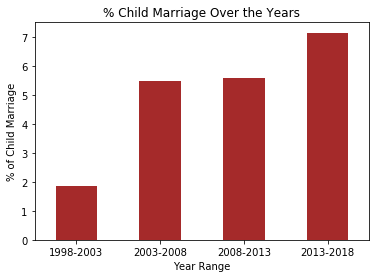

<Figure size 432x288 with 0 Axes>

In [12]:
# Create a line chart based off of the time and the observation values
childmarriage_barchart = childmarriage_grouped_df.plot(kind='bar', color='brown', rot=0)

# Set the xlabel and ylabel using class methods
childmarriage_barchart.set_xlabel("Year Range")
childmarriage_barchart.set_ylabel("% of Child Marriage")
plt.title("% Child Marriage Over the Years")

plt.show()
plt.tight_layout()

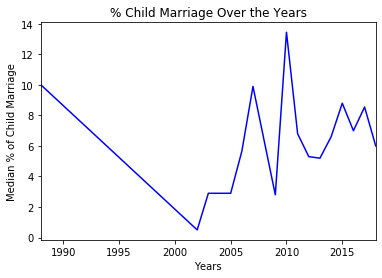

<Figure size 432x288 with 0 Axes>

In [13]:
# Create a line graph based off of the year ranges and the observation values

# Create a GroupBy object based upon "Time Period"
cm2 = childmarriage_final.groupby("Time Period")

# Get the average of each column within the GroupBy object
cm2_df = cm2["Observation Value"].median()
cm2_df

childmarriage_linechart = cm2_df.plot(kind='line', color='blue')

# Set the xlabel and ylabel using class methods
childmarriage_linechart.set_xlabel("Years")
childmarriage_linechart.set_ylabel("Median % of Child Marriage")
plt.title("% Child Marriage Over the Years")

plt.show()
plt.tight_layout()

In [ ]:
# Question 2: What is the correlation of literacy rate and child marriage? (scatter plot with regression line and boxplot) 

In [17]:
# from education_final dataset, group each country and get the mean of values
new_education_final=education_final.groupby(["Country"])
education_grouped_country=new_education_final["Value"].mean()
education_grouped_country_df=pd.DataFrame(education_grouped_country)
education_grouped_country_df

,Value
Country,
afghanistan,35.439102
africa (northern),55.736070
africa (sub-saharan),51.741533
albania,74.590923
algeria,67.323016
...,...
western asia and northern africa,61.662127
world,63.969104
yemen,51.241751


In [18]:
# childmarriage_final dataset, group each country and get the mean of values
new_childmarriage_final=childmarriage_final.groupby(["Country"])
childmarriage_grouped_country=new_childmarriage_final["Observation Value"].mean()
childmarriage_grouped_country_df=pd.DataFrame(childmarriage_grouped_country)
childmarriage_grouped_country_df

,Observation Value
Country,
afghanistan,16.966667
albania,4.800000
algeria,1.450000
angola,14.733333
armenia,1.900000
...,...
vanuatu,9.500000
viet nam,4.733333
yemen,20.650000


In [19]:
# Merge data from childmarriage_grouped_country_df and education_grouped_country_df to compare
childmarriage_and_education = pd.merge(childmarriage_grouped_country_df, education_grouped_country_df, how="inner", on="Country")
childmarriage_and_education
childmarriage_and_education = childmarriage_and_education.rename(columns={"Observation Value":"Overall Averaged Child Marriage Value",
                                                                         "Value":"Averaged Education Value"})
childmarriage_and_education

,Overall Averaged Child Marriage Value,Averaged Education Value
Country,,
afghanistan,16.966667,35.439102
albania,4.800000,74.590923
algeria,1.450000,67.323016
angola,14.733333,56.702264
armenia,1.900000,75.139868
...,...,...
vanuatu,9.500000,65.044334
viet nam,4.733333,71.899058
yemen,20.650000,51.241751


y = -0.38155x + 35.65
The r-squared is: -0.6880431291174198


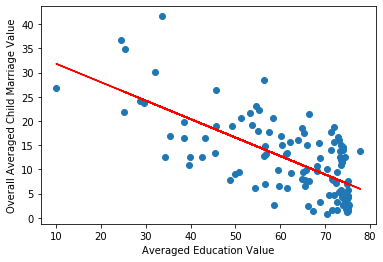

In [20]:
# Correlation of Education with child marriage
x_values = childmarriage_and_education['Averaged Education Value']
y_values = childmarriage_and_education['Overall Averaged Child Marriage Value']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Averaged Education Value")
plt.ylabel("Overall Averaged Child Marriage Value")
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.show()

In [ ]:
print (childmarriage_and_education['Averaged Education Value'].median())

In [ ]:
higher_education = childmarriage_and_education.loc[childmarriage_and_education['Averaged Education Value'] >=67.7080]
lower_education=childmarriage_and_education.loc[childmarriage_and_education['Averaged Education Value'] <67.7080]
lower_education_marriage=lower_education['Overall Averaged Child Marriage Value']
higher_education_marriage=higher_education['Overall Averaged Child Marriage Value']
lower_education_marriage
stats.f_oneway(higher_education_marriage, lower_education_marriage)

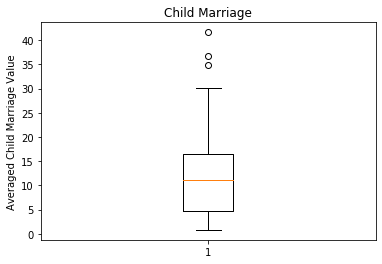

The lower quartile of averaged child marriage value is: 4.783333333333333
The upper quartile of averaged child marriage value is: 16.441666666666666
The interquartile range of averaged child marriage value is: 11.658333333333333
Values below -12.704166666666667 could be outliers.
Values above 33.92916666666667 could be outliers.
There are outliers for child marriage:
Country
central african republic    41.633333
chad                        34.866667
niger                       36.666667
Name: Overall Averaged Child Marriage Value, dtype: float64


In [21]:
# Boxplot for child marriage 
fig1, ax1 = plt.subplots()
ax1.set_title('Child Marriage')
ax1.set_ylabel('Averaged Child Marriage Value')
value=childmarriage_and_education["Overall Averaged Child Marriage Value"]
ax1.boxplot(value)
plt.show()
# Give quartile calculations
quartiles = value.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
# Print result for child marriage
print(f"The lower quartile of averaged child marriage value is: {lowerq}")
print(f"The upper quartile of averaged child marriage value is: {upperq}")
print(f"The interquartile range of averaged child marriage value is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"There are outliers for child marriage:")
outliers=value.loc[value > 33.92916666666667]
print(outliers)

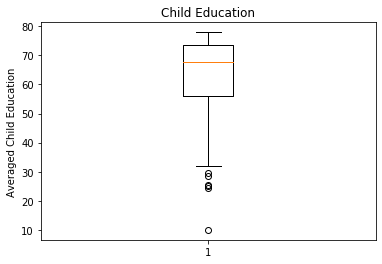

The lower quartile of averaged child education is: 56.120418125
The upper quartile of averaged child education is: 73.66726819078946
The interquartile range of averaged child education is: 17.546850065789457
Values below 29.800143026315816 could be outliers.
Values above 99.98754328947365 could be outliers.
There are outliers for child education:
Country
burkina faso    25.206404
chad            25.401568
guinea          28.705602
mali            29.714138
niger           24.506163
somalia         10.034673
Name: Averaged Education Value, dtype: float64


In [22]:
# Boxplot for child education 
fig1, ax1 = plt.subplots()
ax1.set_title('Child Education')
ax1.set_ylabel('Averaged Child Education')
value=childmarriage_and_education["Averaged Education Value"]
ax1.boxplot(value)
plt.show()
# Give quartile calculations
quartiles = value.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
# Print result for Campomulin
print(f"The lower quartile of averaged child education is: {lowerq}")
print(f"The upper quartile of averaged child education is: {upperq}")
print(f"The interquartile range of averaged child education is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
outliers=value.loc[value < 29.800143026315816]
print(f"There are outliers for child education:")
print(outliers)

In [ ]:
# Question 3: What is the geographical impact on child marriage and education? (heat map one for education and one for child marriage)

In [23]:
c_final=childmarriage_final.dropna()
group_cm_df = c_final.groupby(["Country"])
childmarriage_df=group_cm_df.mean()
childmarriage_df['Time Period'].map("${:.1f}".format)
childmarriage_df
#childmarriage_final.dtypes

#childmarriage_final['Observation Value'].max()

,Time Period,Observation Value,latitude,longitude
Country,,,,
afghanistan,2015.000000,16.966667,33.939110,67.709953
albania,2018.000000,4.800000,41.153332,20.168331
algeria,2013.000000,1.450000,28.033886,1.659626
angola,2016.000000,14.733333,-11.202692,17.873887
armenia,2016.000000,1.900000,40.069099,45.038189
...,...,...,...,...
uzbekistan,2004.666667,2.666667,41.377491,64.585262
vanuatu,2013.000000,9.500000,-15.376706,166.959158
yemen,2013.000000,20.650000,15.552727,48.516388


In [24]:
education_final.dtypes
e_final=education_final.dropna()
group_e_df = e_final.groupby(["Country"])
education_df=group_e_df.mean()
education_df

#education_final['Value'].max()

,TIME,Value,latitude,longitude
Country,,,,
afghanistan,2002.666667,35.439102,33.939110,67.709953
albania,2010.000000,74.590923,41.153332,20.168331
algeria,2004.200000,67.323016,28.033886,1.659626
american samoa,1980.000000,73.495482,-14.270972,-170.132217
angola,2007.500000,56.702264,-11.202692,17.873887
...,...,...,...,...
uzbekistan,2012.666667,75.234261,41.377491,64.585262
vanuatu,1998.833333,65.044334,-15.376706,166.959158
yemen,1999.000000,51.241751,15.552727,48.516388


In [27]:
fig = gmaps.figure()
fig

Figure(layout=FigureLayout(height='420px'))

In [28]:
locations = childmarriage_df[["latitude", "longitude"]].astype(float)

value = childmarriage_df["Observation Value"].astype(float)

heat_layer = gmaps.heatmap_layer(locations, weights=value, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=4)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [29]:
locations = education_df[["latitude", "longitude"]].astype(float)

value = education_df["Value"].astype(float)

heat_layer = gmaps.heatmap_layer(locations, weights=value, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=4,opacity=0)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

(-1.1187489980859993,
 1.1008928094326667,
 -1.107986685602429,
 1.1198953392663173)

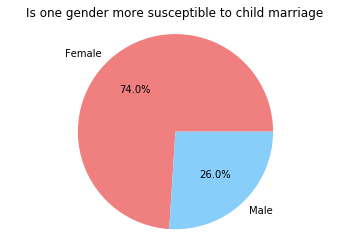

In [14]:
# Question 4: Is one gender more susceptible to child marriage than the other? (pie graph)
gender_df = childmarriage_final.groupby('Sex')['Sex'].count()
gender = ["Female", "Male"] 
colors = ['lightcoral', 'lightskyblue']

plt.pie(gender_df,labels=gender, autopct="%1.1f%%",colors=colors, shadow=False, startangle=0)
plt.title("Is one gender more susceptible to child marriage")
plt.axis("equal")

#lt.savefig("../Images/Gender_childmarriage.png")
#plt.show()

In [15]:
gender1_df = childmarriage_final.loc[(childmarriage_final['Indicator']=='Percentage of women (aged 20-24 years) married or in union before age 18')|(childmarriage_final['Indicator']=='Percentage of men (aged 20-24 years) married or in union before age 18')]
gender1_df

,Country,Indicator,Sex,Time Period,Current Age,Observation Value,Unit of Measure,latitude,longitude,Year Range
0,botswana,Percentage of women (aged 20-24 years) married...,Female,1988,20 to 24 years old,10.0,%,-22.328474,24.684866,NaN
1,uzbekistan,Percentage of men (aged 20-24 years) married o...,Male,2002,20 to 24 years old,0.5,%,41.377491,64.585262,1998-2003
2,philippines,Percentage of men (aged 20-24 years) married o...,Male,2003,20 to 24 years old,2.9,%,12.879721,121.774017,1998-2003
4,south africa,Percentage of women (aged 20-24 years) married...,Female,2003,20 to 24 years old,5.6,%,-30.559482,22.937506,1998-2003
5,cabo verde,Percentage of men (aged 20-24 years) married o...,Male,2005,20 to 24 years old,3.0,%,NaN,NaN,2003-2008
...,...,...,...,...,...,...,...,...,...,...
334,albania,Percentage of men (aged 20-24 years) married o...,Male,2018,20 to 24 years old,1.2,%,41.153332,20.168331,2013-2018
335,benin,Percentage of men (aged 20-24 years) married o...,Male,2018,20 to 24 years old,4.8,%,9.307690,2.315834,2013-2018
339,albania,Percentage of women (aged 20-24 years) married...,Female,2018,20 to 24 years old,11.8,%,41.153332,20.168331,2013-2018
340,indonesia,Percentage of women (aged 20-24 years) married...,Female,2018,20 to 24 years old,11.2,%,-0.789275,113.921327,2013-2018


(-1.1104015257670696,
 1.10049535343878,
 -1.1230708828196667,
 1.1130014718327983)

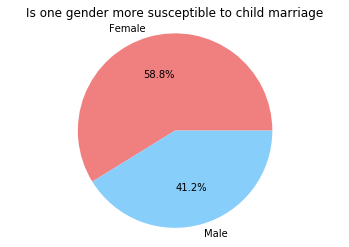

In [16]:
gender1_df = gender1_df.groupby('Sex')['Sex'].count()
gender = ["Female", "Male"] 
colors = ['lightcoral', 'lightskyblue']

plt.pie(gender1_df,labels=gender, autopct="%1.1f%%",colors=colors, shadow=False, startangle=0)
plt.title("Is one gender more susceptible to child marriage")
plt.axis("equal")

#lt.savefig("../Images/Gender_childmarriage.png")
#plt.show()

In [ ]:
# Conclusion: our null hypothesis is that education has no impact on child marriage rates.